**Assignment # 2, CNN over Fasion MNIST**

In this assignment you are requested to build a convolutional network and train it over the Fasion MNIST data, which is a collection of 28X28 back and white images, classified into 10 different classes of clothing items. For more information about Fashion MNIST you may refer to: 
https://github.com/zalandoresearch/fashion-mnist 

Submitted:
* Hadar Pur
* Rotem Feinblat



In [ ]:
# Loading Fashion MNIST


import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import torch.nn.functional as F
import matplotlib.pyplot as plt
from datetime import datetime as dt
import time as t


trainset = torchvision.datasets.FashionMNIST(root='./data', train=True,
                                        download=True, transform=transforms.ToTensor())

testset = torchvision.datasets.FashionMNIST(root='./data', train=False,
                                       download=True, transform=transforms.ToTensor())

classes = ('T-shirt/top', 'Trouser', 'Pullover', 'Dress',
           'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot')

Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw


Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw
Processing...
Done!





/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [ ]:
# Use dataloaders for train and test (batch size is 4)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True)

testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False)

In [ ]:
# The images are of 1, 28, 28 size (only one black-white channel)

trainset[0][0].shape

torch.Size([1, 28, 28])

# **Part 1**: Implementing a CNN network for Fashion MNIST
Here is what you need to do; you are encoureged to look at notebook "DL Notebook 9 - CIFAR CNN" when trying to complete the next steps.


Write a network CNNFMnist, that has the following architecture:

* Convolution with 10 3X3 filters
* Relu
* Max pool with 2X2
* Convolution with 5 3X3 filters
* Relu
* Convolution with 16 3X3 filters
* Relu
* Max pool with 2X2
* Liner, output size 128
* Relu
* Liner, output size 64
* Relu
* Liner, output size 10

In [ ]:
class CNNFMnist(nn.Module):

    def __init__(self):
      super(CNNFMnist, self).__init__()
      # Your code goes here
      # in = 1 (black and white), 10 filters, 3X3 square convolution
      self.conv1 = nn.Conv2d(1, 10, 3)
      # in = 10 (output prev conv), 5 filters, 3X3 square convolution
      self.conv2 = nn.Conv2d(10, 5, 3)
      # in = 5 (output prev conv), 16 filters, 3X3 square convolution
      self.conv3 = nn.Conv2d(5, 16, 3)

      # now a few fully connected layers, 128 output
      self.fc1 = nn.Linear(16 * 4 * 4, 128)
      # 128 input (output prev Linear), 64 output
      self.fc2 = nn.Linear(128, 64)
      # 64 input (output prev Linear), 10 output
      self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
      # Your code goes here
      # Convolution with 10 3X3 filters
      # Relu
      # Max pool with 2X2
      x = F.max_pool2d(F.relu(self.conv1(x)), 2)

      # Convolution with 5 3X3 filters
      # Relu
      x = F.relu(self.conv2(x))

      # Convolution with 16 3X3 filters
      # Relu
      # Max pool with 2X2
      x = F.max_pool2d(F.relu(self.conv3(x)), 2)
      
      x = torch.flatten(x, start_dim=1)

      # Liner, output size 128
      # Relu
      x = F.relu(self.fc1(x))

      # Liner, output size 64
      # Relu    
      x = F.relu(self.fc2(x))

      # Liner, output size 10
      x = self.fc3(x)
      return x



Write a code that trains the network with FashionMNIST train dataset, for classification (use cross entropy, and SGD).
Run the network for at least 10 epochs, over the entire dataset. Make sure to print the loss over the train set as well as the **test set** over time (say, every 1000 batches, but it's up to you), so you will know where you are during training. 

Note, measuring loss of test is similar to measuring loss over the train test. However, make sure not to run the test images in back propagation. Use them only in forward and calulate the average loss over the entire test set. Since it will make the training process run slower, you should measure loss for the test set only at the end of an epoch (so overall you get 10 loss values for the test set). You are encoureged to write a different function for claculating the loss of the test set, and then call it from the training procedure.


You should collect the loss values in an array, so you can plot then into two curves, one for train and one for test.

In addition, you should measure the time it takes you to train the network completely.



In [ ]:
# Your code goes here
# net = CNNFMnist().cuda()     # -- For GPU
net = CNNFMnist()            # -- For CPU
print(net)

CNNFMnist(
  (conv1): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(10, 5, kernel_size=(3, 3), stride=(1, 1))
  (conv3): Conv2d(5, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=256, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)


In [ ]:
img, labels = iter(trainloader).next()
print(img)
print(img.size())
print(labels)

tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
    

In [ ]:
# define loss function
criterion = nn.CrossEntropyLoss()

In [ ]:
# define the optimizer
optimizer = torch.optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [ ]:
def test_loss_calculation():
  loss_calc = 0.0

  for i, data  in enumerate(testloader, 0):
    # get the inputs
    inputs, labels = data 
      
    # inputs = inputs.cuda()  # -- for GPU
    # labels = labels.cuda()  # -- for GPU

    outputs = net(inputs)
    loss = criterion(outputs, labels)
    loss_calc += loss.item()

  loss = loss_calc / len(testloader.dataset)
  return loss

def train_loss_calculation(epochs, batche_size):
  train_loss_array=[]
  test_loss_array=[]

  # training loop
  for e in range(epochs):  
    running_loss = 0.0
    train_loss = 0.0
    test_loss_calc = 0.0
    for i, data in enumerate(trainloader, 0):
      # get the inputs
      inputs, labels = data # -- For CPU
        
      # inputs = inputs.cuda() # -- For GPU
      # labels = labels.cuda() # -- For GPU

      # zero the parameter gradients
      optimizer.zero_grad()

      # forward + backward + optimize
      outputs = net(inputs)

      loss = criterion(outputs, labels)
      loss.backward()
      optimizer.step()

      # print statistics
      running_loss += loss.item()
      train_loss += loss.item()
      if (i+1) % batche_size == 0:    
        print('[%d, %5d] train loss: %.3f' %(e + 1, i + 1, running_loss / batche_size))
        running_loss = 0.0

    # calculate train loss for epoch
    train_loss_calc = train_loss / len(trainloader.dataset)
    train_loss_array.append(train_loss_calc)
    # calculate test loss for epoch
    net.eval()
    test_loss_calc = test_loss_calculation()
    test_loss_array.append(test_loss_calc)
    print('[%d] test loss: %.3f' %(e + 1, test_loss_calc))
    net.train()

  return train_loss_array, test_loss_array


def train(epochs, batche_size):
  # measure start time
  start = t.time()
  start_date = dt.now().strftime("%H:%M:%S")
  print('Start Training at:', start_date)

  train_loss_array, test_loss_array = train_loss_calculation(epochs, batche_size)

  # measure end time
  end = t.time()
  end_date = dt.now().strftime("%H:%M:%S")
  print('Finished Training at: ', end_date)

  # measure time time
  print(f'Training tooks: {end - start} sec')
  return train_loss_array, test_loss_array



In [ ]:
# setup
batch_size = 1000
epochs = 10
epoch_array = list(range(1,epochs+1))

# train 
train_loss_array, test_loss_array = train(epochs, batch_size)

Start Training at: 08:13:26
[1,  1000] train loss: 2.302
[1,  2000] train loss: 2.303
[1,  3000] train loss: 2.300
[1,  4000] train loss: 2.000
[1,  5000] train loss: 1.052
[1,  6000] train loss: 0.842
[1,  7000] train loss: 0.745
[1,  8000] train loss: 0.685
[1,  9000] train loss: 0.623
[1, 10000] train loss: 0.611
[1, 11000] train loss: 0.596
[1, 12000] train loss: 0.567
[1, 13000] train loss: 0.554
[1, 14000] train loss: 0.571
[1, 15000] train loss: 0.564
[1] test loss: 0.134
[2,  1000] train loss: 0.543
[2,  2000] train loss: 0.474
[2,  3000] train loss: 0.499
[2,  4000] train loss: 0.477
[2,  5000] train loss: 0.501
[2,  6000] train loss: 0.478
[2,  7000] train loss: 0.485
[2,  8000] train loss: 0.457
[2,  9000] train loss: 0.473
[2, 10000] train loss: 0.444
[2, 11000] train loss: 0.438
[2, 12000] train loss: 0.421
[2, 13000] train loss: 0.418
[2, 14000] train loss: 0.419
[2, 15000] train loss: 0.420
[2] test loss: 0.105
[3,  1000] train loss: 0.401
[3,  2000] train loss: 0.407
[3

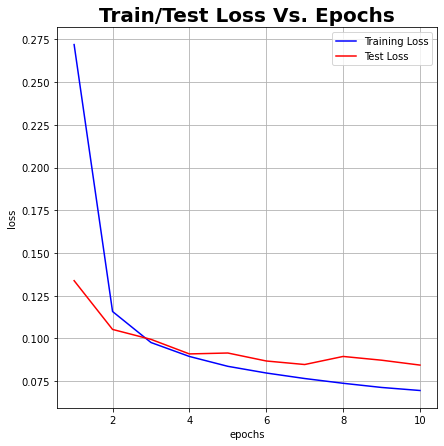

In [ ]:
# both loss graph
plt.figure(figsize = (15,7))
plt.subplot(1, 2, 2)
plt.plot(epoch_array, train_loss_array, 'b', label='Training Loss')
plt.plot(epoch_array, test_loss_array, 'r', label='Test Loss')
plt.title('Train/Test Loss Vs. Epochs', fontsize = 20, weight='bold')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(loc = 'upper right')
plt.grid()
plt.show()

Write a function that evaluates the resulted model over the entire test data of FashionMNIST. Provide a single accuracy number.

In [ ]:
# Your code goes here
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data 
        
        # images = images.cuda()  # -- for GPU
        # labels = labels.cuda()  # -- for GPU

        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the test images: %d %%' % (100 * correct / total))

Accuracy of the network on the test images: 88 %


# **Part 2**: Training with a GPU 
You are requested to change your code to use the GPU instead of the CPU.
This can be easily done bu converting every torch.tensor to torch.cuda.tensor. 

Specific instructions:
* Change the hardware equipent of your colab notebook. To do that, go to the "Runtime" menu, and then to "Change runtime type". In the dialog box, change "Hardware accelerator" to GPU.
* Please follow the lines that were commented out with the comment    # -- For GPU
* Also, remove the lines that have the comment # -- For CPU

Train your network again and compare training time.

# **Part 3**: Transfer Learning
Training data is a valuable resource, and sometimes there is not enough of it for training a neural netowrk at scale. To handle this situation, one approach is transfer learning, where we train our network on a different related task, and then switch to train it on the downstream task that we focus on. In this last part of the assignment, you are requested to pretrain your network on CIFAR-10, then train it on Fashion-MNIST, and measure its contribution to the results. To do that, please follow the steps:

**Step 1**

Modify your CNNFMnist implementation to return the output of the layer one before last after Relu (Linear layer of size 64, above) in addition to the final output. For example:

```
def forward(self, x):
  ...
  return h, out
```

 and train it on the training-set part of CIFAR-10. Use batch size of 4, and train it for at least 10 epochs. Note that CIFAR-10 images are of different shapes (3X32X32), therefore a conversion into 1X28X28 is needed. To do that, when you load CIFAR-10 using a torchvision Dataset, you can use the transformer torchvision.transforms.Grayscale(num_output_channels=1) in order to convert the images to a 1X32X32 grayscale volume:

```
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=torchvision.transforms.Compose([torchvision.transforms.Grayscale(num_output_channels=1),
                                    torchvision.transforms.ToTensor()]))
```
Then, from each 1X32X32 image, sample 10 1X28X28 images at random positions, and use them for training (*optional* - for data augmentation, if you want, you can also generate the reflection of each of the 10 images and add them the training set).

**Setp 2**

Once done, write a new Module CNNFMnist2, which uses CNNFMnist as one of its sub modules, followed by some additional layers. The output of CNNFMnist that goes into the next layer, should be the output of the 64 neuron one-before-last layer, as described above. CNNFMnist2 should have the following architecture:

* CNNFMnist
* Liner, output size 32
* Relu
* Liner, output size 16
* Relu
* Liner, output size 10

Make sure to allow the user to assign a pre-trained version CNNFMnist as a member of the module. For example:

```
class CNNFMnist2(nn.Module):
    def __init__(self, trained_cnnfmnist_model):
        super(CNNFMnist2, self).__init__()
        self.trained_cnnfmnist_model = trained_cnnfmnist_model
        self.fc1 = nn.Linear(64, 32)
        ...
```

**Step 3**

Train and eval CNNFMnist2 on Fashion-MNIST a few times:
- Using the pre-trained version of CNNFMnist.
- Using a fresh CNNFMnist instance (without training it).
- (Optional) Using the pre-trained version of CNNFMnist, after freezing its weights using the .eval() function.

Report on evaluation results (accuracy) for all of those cases.

In [ ]:
###Part 3:

In [ ]:
class CNNFMnist(nn.Module):

    def __init__(self):
      super(CNNFMnist, self).__init__()
      # Your code goes here
      # in = 1 (black and white), 10 filters, 3X3 square convolution
      self.conv1 = nn.Conv2d(1, 10, 3)
      # in = 10 (output prev conv), 5 filters, 3X3 square convolution
      self.conv2 = nn.Conv2d(10, 5, 3)
      # in = 5 (output prev conv), 16 filters, 3X3 square convolution
      self.conv3 = nn.Conv2d(5, 16, 3)

      # now a few fully connected layers, 128 output
      self.fc1 = nn.Linear(16*4*4, 128)
      # 128 input (output prev Linear), 64 output
      self.fc2 = nn.Linear(128, 64)
      # 64 input (output prev Linear), 10 output
      self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
      # Your code goes here
      # Convolution with 10 3X3 filters
      # Relu
      # Max pool with 2X2
      x = F.max_pool2d(F.relu(self.conv1(x)), (2,2))

      # Convolution with 5 3X3 filters
      # Relu
      x = F.relu(self.conv2(x))

      # Convolution with 16 3X3 filters
      # Relu
      # Max pool with 2X2
      x = F.max_pool2d(F.relu(self.conv3(x)), (2,2))
      
      x = torch.flatten(x, start_dim=1)

      # Liner, output size 128
      # Relu
      x = F.relu(self.fc1(x))

      # Liner, output size 64
      # Relu    
      h = F.relu(self.fc2(x))

      # Liner, output size 10
      out = self.fc3(h)
      return h,out



In [ ]:
#####the train set 
trainset = torch.utils.data.ConcatDataset([torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=torchvision.transforms.Compose([
                                                                                                 torchvision.transforms.Grayscale(num_output_channels=1),
                                                                                                 torchvision.transforms.RandomCrop(28),
                                                                                                 torchvision.transforms.ToTensor()
                                                                                                 ])) for i in range(10)])

trainloader_new = torch.utils.data.DataLoader(trainset, shuffle=True, batch_size=4)

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


In [ ]:
###the test set
testset = torch.utils.data.ConcatDataset([torchvision.datasets.CIFAR10(root='./data', train=False,
                                        download=True, transform=torchvision.transforms.Compose([
                                                                                                 torchvision.transforms.Grayscale(num_output_channels=1),
                                                                                                 torchvision.transforms.RandomCrop(28),
                                                                                                 torchvision.transforms.ToTensor()
                                                                                                 ])) for i in range(10)])

testloader_new = torch.utils.data.DataLoader(testset, shuffle=True, batch_size=4)

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


In [ ]:
def net_pre_train(trainloader_new):
  pretraind_net = CNNFMnist().cuda()     # -- For GPU
  criterion = nn.CrossEntropyLoss()
  optimizer = torch.optim.SGD(pretraind_net.parameters(), lr=0.001, momentum=0.9)

  train_loss_array=[]
  test_loss_array=[]

  epochs=10
  batche_size=25000

    # training loop
  start = t.time()
  start_date = dt.now().strftime("%H:%M:%S")
  print('Start Training at:', start_date)
  for e in range(epochs):  
      running_loss = 0.0
      train_loss = 0.0
      for i, data in enumerate(trainloader_new, 0):
        # get the inputs
        inputs, labels = data # -- For CPU
          
        inputs = inputs.cuda() # -- For GPU
        labels = labels.cuda() # -- For GPU

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = pretraind_net(inputs)

        loss = criterion(outputs[1], labels)
        loss.backward()
        optimizer.step()

        
        running_loss += loss.item()
        train_loss += loss.item()
        if (i+1) % batche_size == 0:    
          print('[%d, %5d] train loss: %.3f' %(e + 1, i + 1, running_loss / batche_size))
          running_loss = 0.0

      # calculate train loss for epoch
      train_loss_calc = train_loss / len(trainloader_new.dataset)
      train_loss_array.append(train_loss_calc)
      
      
      # calculate test loss for epoch
      
      test_loss = 0.0
      running_loss_test = 0.0
      for j, data in enumerate(testloader_new, 0):                   
              # get the inputs
              inputs, labels = data
              inputs = inputs.cuda() # -- For GPU
              labels = labels.cuda() # -- For GPU

              optimizer.zero_grad()

              # forward + backward + optimize
              outputs = pretraind_net(inputs)             
              loss = criterion(outputs[1], labels) 

              # print statistics
              running_loss_test += loss.item()
              if (j+1) % 5000 == 0:    
                  print('[%d, %5d] test loss: %.3f' %(e + 1, j + 1, running_loss_test / 5000))
                  running_loss_test = 0.0

      test_loss = test_loss / len(testloader_new.dataset)
      test_loss_array.append(test_loss)

  end = t.time()
  end_date = dt.now().strftime("%H:%M:%S")
  print('Finished Training at: ', end_date)
  print(f'Training took: {end - start} sec')
        
  return pretraind_net

    

In [ ]:
pretrain_net=net_pre_train(trainloader_new)

Start Training at: 17:51:48
[1, 25000] train loss: 2.009
[1, 50000] train loss: 1.640
[1, 75000] train loss: 1.524
[1, 100000] train loss: 1.453
[1, 125000] train loss: 1.390
[1,  5000] test loss: 1.397
[1, 10000] test loss: 1.411
[1, 15000] test loss: 1.398
[1, 20000] test loss: 1.394
[1, 25000] test loss: 1.407
[2, 25000] train loss: 1.344
[2, 50000] train loss: 1.313
[2, 75000] train loss: 1.286
[2, 100000] train loss: 1.270
[2, 125000] train loss: 1.253
[2,  5000] test loss: 1.360
[2, 10000] test loss: 1.347
[2, 15000] test loss: 1.358
[2, 20000] test loss: 1.372
[2, 25000] test loss: 1.366
[3, 25000] train loss: 1.243
[3, 50000] train loss: 1.234
[3, 75000] train loss: 1.215
[3, 100000] train loss: 1.213
[3, 125000] train loss: 1.210
[3,  5000] test loss: 1.273
[3, 10000] test loss: 1.294
[3, 15000] test loss: 1.285
[3, 20000] test loss: 1.278
[3, 25000] test loss: 1.290
[4, 25000] train loss: 1.192
[4, 50000] train loss: 1.191
[4, 75000] train loss: 1.189
[4, 100000] train loss: 

In [ ]:
print("part 2:")

part 2:


In [ ]:
class CNNFMnist2(nn.Module):
    def __init__(self, trained_cnnfmnist_model):
        super(CNNFMnist2, self).__init__()
        self.trained_cnnfmnist_model = trained_cnnfmnist_model
        self.fc1 = nn.Linear(64, 32)
        self.fc2 = nn.Linear(32, 16)
        self.fc3 = nn.Linear(16, 10)

    def forward(self, x):
      x,_ = self.trained_cnnfmnist_model(x)
      x = F.relu(self.fc1(x))
      x = F.relu(self.fc2(x))
      out = self.fc3(x)
      return out

In [ ]:
print("part 3:")

part 3:


In [ ]:
def after_pre_train(pre_trained_net):
        new_net = CNNFMnist2(pre_trained_net).cuda()      
        criterion = nn.CrossEntropyLoss()
        optimizer = torch.optim.SGD(new_net.parameters(), lr=0.001, momentum=0.9)


        train_loss_array=[]
        test_loss_array=[]

        epochs=10
        batche_size=25000

          # training loop
        start = t.time()
        start_date = dt.now().strftime("%H:%M:%S")
        print('Start Training at:', start_date)
        for e in range(epochs):  
            running_loss = 0.0
            train_loss = 0.0
            for i, data in enumerate(trainloader, 0):
              # get the inputs
              inputs, labels = data # -- For CPU
                
              inputs = inputs.cuda() # -- For GPU
              labels = labels.cuda() # -- For GPU

              # zero the parameter gradients
              optimizer.zero_grad()

              # forward + backward + optimize
              outputs = new_net(inputs)

              loss = criterion(outputs, labels)
              loss.backward()
              optimizer.step()

              # print statistics
              running_loss += loss.item()
              train_loss += loss.item()
              if (i+1) % batche_size == 0:    
                print('[%d, %5d] train loss: %.3f' %(e + 1, i + 1, running_loss / batche_size))
                running_loss = 0.0

            # calculate train loss for epoch
            train_loss_calc = train_loss / (i+1)
            train_loss_array.append(train_loss_calc)
            
            
            # calculate test loss for epoch
            
            test_loss = 0.0
            running_loss_test = 0.0
            for j, data in enumerate(testloader, 0):                 
                    # get the inputs
                    inputs, labels = data
                    inputs = inputs.cuda() # -- For GPU
                    labels = labels.cuda() # -- For GPU

                    optimizer.zero_grad()

                    # forward + backward + optimize
                    outputs = new_net(inputs)             
                    loss = criterion(outputs, labels) 
                    test_loss += loss.item()      

                    running_loss_test += loss.item()
                    if (j+1) % 5000 == 0:    
                        print('[%d, %5d] test loss: %.3f' %(e + 1, j + 1, running_loss_test / 5000))
                        running_loss_test = 0.0

            test_loss = test_loss / (j+1)
            test_loss_array.append(test_loss)

            print('epoch [%d] train loss: %.3f' %(e + 1, train_loss_array[e]))
            print('epoch [%d] test loss: %.3f' %(e + 1, test_loss_array[e]))
        end = t.time()
        end_date = dt.now().strftime("%H:%M:%S")
        print('Finished Training at: ', end_date)
        print(f'Training tooks: {end - start} sec')
        
        
        return new_net


    

In [ ]:
##pre_train_net=pre_train(trainloader_new)
new_pretraind_net = after_pre_train(pretrain_net)

Start Training at: 20:11:37
epoch [1] train loss: 0.305
epoch [1] test loss: 0.367
epoch [2] train loss: 0.275
epoch [2] test loss: 0.344
epoch [3] train loss: 0.268
epoch [3] test loss: 0.331
epoch [4] train loss: 0.260
epoch [4] test loss: 0.341
epoch [5] train loss: 0.252
epoch [5] test loss: 0.351
epoch [6] train loss: 0.249
epoch [6] test loss: 0.344
epoch [7] train loss: 0.244
epoch [7] test loss: 0.374
epoch [8] train loss: 0.241
epoch [8] test loss: 0.333
epoch [9] train loss: 0.235
epoch [9] test loss: 0.330
epoch [10] train loss: 0.235
epoch [10] test loss: 0.356
Finished Training at:  20:22:00
Training tooks: 623.2499146461487 sec


In [ ]:
# Your code goes here
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data 
        
        images = images.cuda()  # -- for GPU
        labels = labels.cuda()  # -- for GPU

        outputs = new_pretraind_net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network (pretrained) on the test images: %d %%' % (100 * correct / total))

Accuracy of the network (pretrained) on the test images: 87 %


In [ ]:
##fresh net 
new_fresh_net = after_pre_train(CNNFMnist().cuda())

Start Training at: 20:29:40
epoch [1] train loss: 1.722
epoch [1] test loss: 0.830
epoch [2] train loss: 0.579
epoch [2] test loss: 0.512
epoch [3] train loss: 0.455
epoch [3] test loss: 0.481
epoch [4] train loss: 0.397
epoch [4] test loss: 0.402
epoch [5] train loss: 0.366
epoch [5] test loss: 0.366
epoch [6] train loss: 0.343
epoch [6] test loss: 0.374
epoch [7] train loss: 0.323
epoch [7] test loss: 0.389
epoch [8] train loss: 0.311
epoch [8] test loss: 0.359
epoch [9] train loss: 0.297
epoch [9] test loss: 0.356
epoch [10] train loss: 0.289
epoch [10] test loss: 0.352
Finished Training at:  20:39:50
Training tooks: 610.4029746055603 sec


In [ ]:
# Your code goes here
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data 
        
        images = images.cuda()  # -- for GPU
        labels = labels.cuda()  # -- for GPU

        outputs = new_fresh_net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the fresh network on the test images: %d %%' % (100 * correct / total))

Accuracy of the fresh network on the test images: 87 %


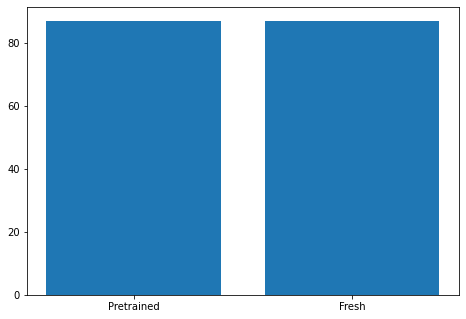

In [ ]:
##graph
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
type = ['Pretrained', 'Fresh']
accuracy = [87,87]
ax.bar(type,accuracy)
plt.show()

# Submission instructions

You should submit a pdf file with the following items:

CPU Experiment:
*   Plot of loss curves (train in blue, test in red)
*   Training time

GPU Experiment:
*   Plot of loss curves (train in blue, test in red)
*   Training time

Transfer Learning Experiment:
* Accuracy results on test set for the 2-3 implemeted settings (see above)

Link for your collab notebook.
ID and names of submitters.


Good luck!